In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## 결정 트리 과대적합(Overfitting)

#### 과(대)적합(overfitting)

- ML에서 학습 데이타를 과하게 학습하는 것  
- 학습(training) 데이터에서는 정확하지만 테스트 데이터에서는 성과가 나쁜 현상  
- 결정 트리의 과적합
    - 나무의 크기가 크거나 가지 수가 많을 때 발생  

### 결정 트리 과적합 시각화

#### `sklearn.datasets.make_classification()` 함수
- 분류용 가상 데이터 생성함수

- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

매개변수
- n_samples : 표본 데이터의 수, 디폴트 100
- n_features : 독립 변수의 수, 디폴트 20
- n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
- n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
- n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
- n_classes : 종속 변수의 클래스 수, 디폴트 2
- n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
- weights : 각 클래스에 할당된 표본 수
- random_state : 난수 발생 시드
    
    
반환값
- 독립 변수 X : (n_samples, n_features) 크기의 배열
- 종속 변수 y : (n_samples,) 크기의 배열

### 가상 데이터 생성

- 피처=2, 클래스=3 인 100개 데이터

In [4]:
from sklearn.datasets import make_classification

In [8]:
X, y=make_classification(n_samples=100,n_features=2,n_redundant=0,n_informative=2, n_classes=3,
n_clusters_per_class=1, random_state=0)

#### 가상 데이터 산점도

In [9]:
X.shape, y.shape

((100, 2), (100,))

In [10]:
X[:10]

array([[ 0.12041909, -1.68941375],
       [ 1.09665605,  1.79445113],
       [ 0.88426577,  1.43370121],
       [ 0.95048011, -0.56202253],
       [ 1.04421447,  0.02899023],
       [ 0.50102164, -1.27508231],
       [ 1.10447379,  0.35117341],
       [-2.5077599 ,  2.48857017],
       [-0.00811816,  0.11564734],
       [ 0.31338067, -0.87926516]])

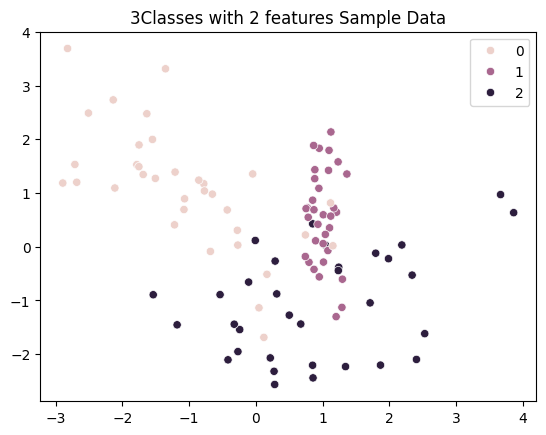

In [12]:
sns.scatterplot(x=X[:,0], y=X[:,1],hue=y)
plt.title('3Classes with 2 features Sample Data')
plt.show()

### 가상 데이터에 대한 결정트리

#### 참고. Classifier의 Decision Boundary를 시각화 하는 함수
- 클래스 값을 예측하는 결정 기준을 색상과 경계로 표시

In [13]:
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),
                         np.linspace(ylim_start,ylim_end, num=200))
    
    # ravel() : 다차원을 1차원으로 품
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()), zorder=1)

#### 트리 생성에 제약을 주지 않은 결정트리

In [15]:
import warnings
warnings.filterwarnings(action='ignore')

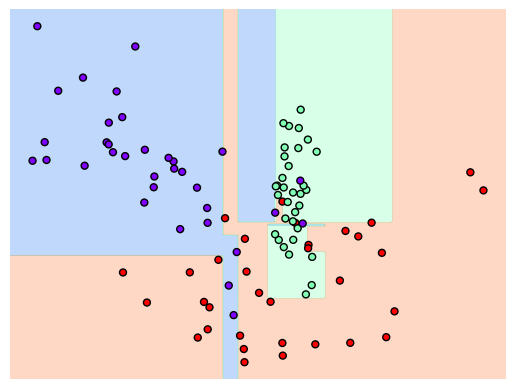

In [17]:
clf = DecisionTreeClassifier()
visualize_boundary(clf, X, y)

#### min_samples_leaf=6 인 경우 결정트리

In [18]:
clf.get_depth()

8

In [19]:
clf.feature_importances_

array([0.57814355, 0.42185645])

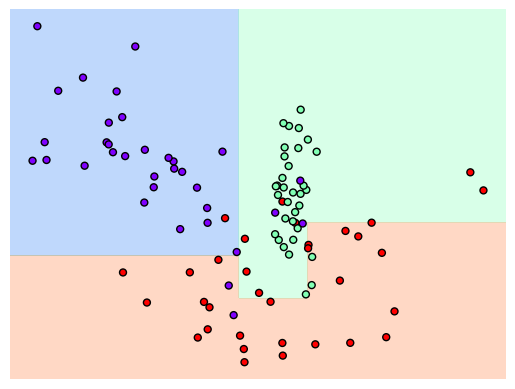

In [20]:
clf = DecisionTreeClassifier(min_samples_leaf=6)
visualize_boundary(clf, X, y)

In [21]:
clf.get_depth()

5

In [22]:
clf.feature_importances_

array([0.52516057, 0.47483943])

In [ ]:
순도부찌개

---------------------------------------